In [ ]:
#Worksheet-6-Part-1: Implementation of Sigmond Regression from Scratch

In [1]:
#1) Sigmond (Logistic) Function
def logistic_function(x):
    """
    Computes the logistic (sigmoid) function.
    """
    import numpy as np
    return 1 / (1 + np.exp(-x))



In [2]:
#2 Log Loss Function
def log_loss(y_true, y_pred):
    """
    Computes binary log loss.
    """
    import numpy as np
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    loss = -(y_true * np.log(y_pred)) - ((1 - y_true) * np.log(1 - y_pred))
    return loss


In [3]:
#3 Cost Function (Average Log Loss)
def cost_function(y_true, y_pred):
    """
    Computes average log loss.
    """
    import numpy as np
    assert len(y_true) == len(y_pred), "Length mismatch"

    n = len(y_true)
    loss_vec = log_loss(y_true, y_pred)
    cost = np.sum(loss_vec) / n
    return cost


In [4]:
#4 Cost Function for Logistic Regression (Vectorized)
def costfunction_logreg(X, y, w, b):
    import numpy as np

    n, d = X.shape
    assert len(y) == n
    assert len(w) == d

    z = np.dot(X, w) + b
    y_pred = logistic_function(z)
    cost = cost_function(y, y_pred)
    return cost


In [5]:
#5 Gradient Computation
def compute_gradient(X, y, w, b):
    import numpy as np

    n, d = X.shape
    assert len(y) == n
    assert len(w) == d

    z = np.dot(X, w) + b
    y_pred = logistic_function(z)

    error = y_pred - y
    grad_w = (1 / n) * np.dot(X.T, error)
    grad_b = (1 / n) * np.sum(error)

    return grad_w, grad_b


In [6]:
#6 Gradient Descent Algorithm
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    import numpy as np

    n, d = X.shape
    cost_history = []
    params_history = []

    for i in range(n_iter):
        grad_w, grad_b = compute_gradient(X, y, w, b)

        w -= alpha * grad_w
        b -= alpha * grad_b

        cost = costfunction_logreg(X, y, w, b)
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history



In [7]:
#7 Prediction Function
def prediction(X, w, b, threshold=0.5):
    import numpy as np

    z = np.dot(X, w) + b
    y_test_prob = logistic_function(z)
    y_pred = (y_test_prob >= threshold).astype(int)
    return y_pred


In [8]:
#8 Evaluation Metrics (Confusion Matrix, Precision, Recall, F1)
def evaluate_classification(y_true, y_pred):
    import numpy as np

    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    confusion_matrix = np.array([[TN, FP],
                                  [FN, TP]])

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0.0

    return confusion_matrix, precision, recall, f1_score



In [ ]:
#Worksheet-6 Part-2

In [9]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
#2 Software Function (Numerically Stable)
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [11]:
#Test
def test_softmax():
    test_cases = [
        np.array([[0, 0, 0]]),
        np.array([[1, 2, 3]]),
        np.array([[1000, 1000, 1000]]),
        np.array([[-1000, -1000, -1000]]),
        np.array([[1, 0, -1]])
    ]
    for z in test_cases:
        out = softmax(z)
        assert np.allclose(out.sum(axis=1), 1)
        assert np.all(out >= 0)
    print("Softmax tests passed!")

test_softmax()


Softmax tests passed!


In [12]:
#Categorical Log-Loss (Single Sample)
def loss_softmax(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-10))


In [13]:
#Test
def test_loss_softmax():
    y_true = np.array([0, 1, 0])
    y_pred = np.array([0.1, 0.8, 0.1])
    assert np.isclose(loss_softmax(y_true, y_pred), -np.log(0.8))
    print("Loss tests passed!")

test_loss_softmax()


Loss tests passed!


In [14]:
#4 Cost Function (Average Cross-Entropy)
def cost_softmax(X, y, W, b):
    n = X.shape[0]
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return -np.sum(y * np.log(y_pred + 1e-10)) / n


In [15]:
#5 Gradient Computation
def cost_softmax(X, y, W, b):
    n = X.shape[0]
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return -np.sum(y * np.log(y_pred + 1e-10)) / n


In [16]:
#6 Gradient Descent Algorithm
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    cost_history = []

    for i in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        W -= alpha * grad_W
        b -= alpha * grad_b

        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)

        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")

    return W, b, cost_history


In [17]:
#7 Prediction Function
def predict_softmax(X, W, b):
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return np.argmax(y_pred, axis=1)


In [18]:
#8 Evalution Metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def evaluate_classification(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)
    return cm, precision, recall, f1


In [19]:
#9 Iris Dataset-Training Pipeline
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
# Creating compute_graident_softmax()
def compute_gradient_softmax(X, y, W, b):
    n = X.shape[0]
    z = np.dot(X, W) + b
    y_pred = softmax(z)

    grad_W = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.sum(y_pred - y, axis=0) / n

    return grad_W, grad_b


In [22]:
# Creating gradient_graident_softmax()
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    cost_history = []

    for i in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        W -= alpha * grad_W
        b -= alpha * grad_b

        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)

        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")

    return W, b, cost_history



In [23]:
#10 Model Training
num_features = X_train.shape[1]
num_classes = y_train.shape[1]

W = np.zeros((num_features, num_classes))
b = np.zeros(num_classes)

alpha = 0.1
n_iter = 1000

W, b, cost_history = gradient_descent_softmax(
    X_train, y_train, W, b, alpha, n_iter, show_cost=True
)


Iteration 0: Cost = 1.006823
Iteration 100: Cost = 0.319428
Iteration 200: Cost = 0.251376
Iteration 300: Cost = 0.211741
Iteration 400: Cost = 0.185004
Iteration 500: Cost = 0.165744
Iteration 600: Cost = 0.151226
Iteration 700: Cost = 0.139898
Iteration 800: Cost = 0.130812
Iteration 900: Cost = 0.123360
Iteration 999: Cost = 0.117192


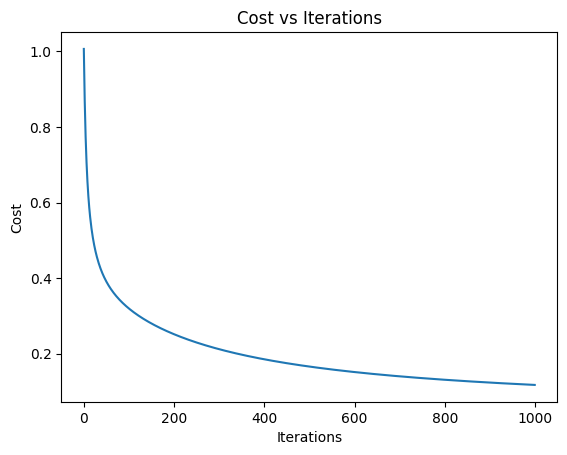

In [24]:
#Cost curve
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()


In [25]:
#11 Evalution
y_train_pred = predict_softmax(X_train, W, b)
y_test_pred = predict_softmax(X_test, W, b)

train_cost = cost_softmax(X_train, y_train, W, b)
test_cost = cost_softmax(X_test, y_test, W, b)

print(f"Train Cost: {train_cost:.4f}")
print(f"Test Cost: {test_cost:.4f}")


Train Cost: 0.1172
Test Cost: 0.1575


In [26]:
y_test_true = np.argmax(y_test, axis=1)
cm, precision, recall, f1 = evaluate_classification(y_test_true, y_test_pred)

print("Confusion Matrix:\n", cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
